### Digital signal processing in python - Testing


first of all I have to get the audio out of the video, and then I have to get a part of the audio.
ffmepg is used for this.

Consider an input file (-i), such as, input.mp4 or other files- flv, avi, ...). To remove the video (-vn) and take audio out uncompressed (output.wav) at a sample rate of 44100 Hz (-ar 44100) in pulse code modulated with signed, 16 bit, little endian (-acodec pcm_s16le) samples and 2 channels (stereo) (-ac 2) use the following command


In [1]:
!ffmpeg -i video.mp4 -vn -acodec pcm_s16le -ar 44100 -ac 2 output.wav


ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

In [3]:
# take out a part of the audio
!ffmpeg -i output.wav -acodec copy -t 00:02:00 -ss 00:01:30 sample.wav

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

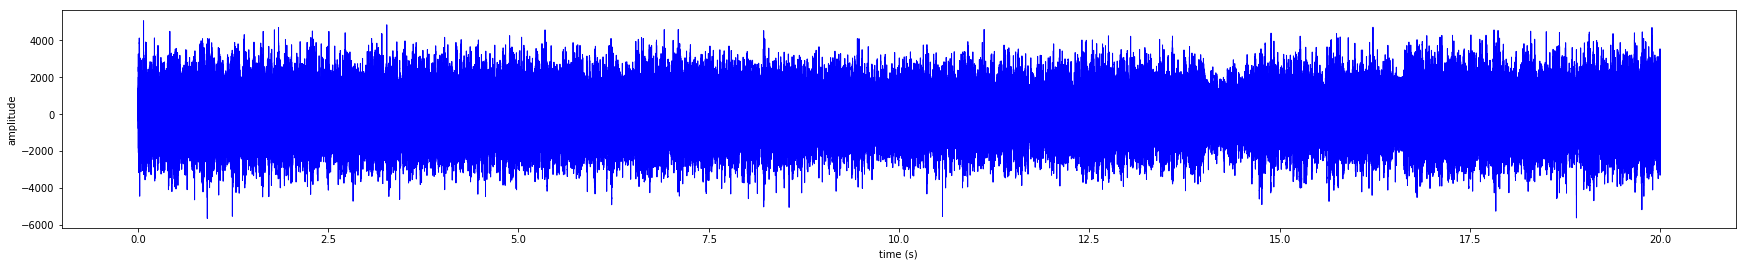

In [6]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('split.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:,0], data[:,1], color="blue")
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
# plt.show()

In [9]:
import thinkdsp

sample = thinkdsp.read_wave('split.wav')
sample.make_audio()

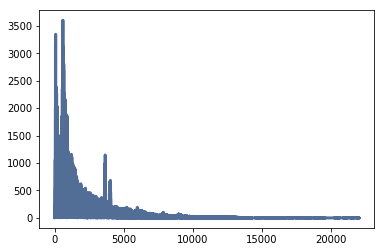

In [10]:
spectrum = sample.make_spectrum()
spectrum.plot()

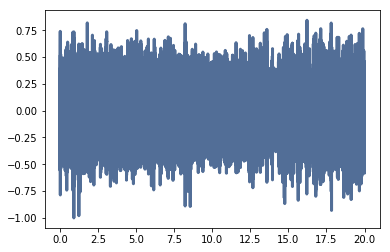

In [14]:
sample.plot()

In [12]:
# take a segment
whistle = sample.segment(1, 1.1)
whistle.make_audio()

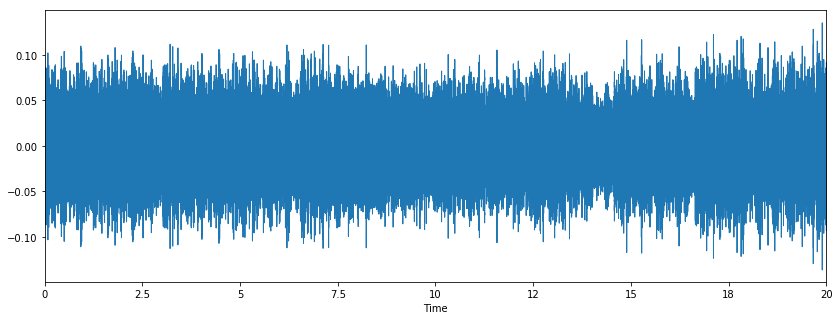

In [15]:
# testing another library - librosa

import matplotlib.pyplot as plt
import librosa.display

x, sr = librosa.load('split.wav')

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

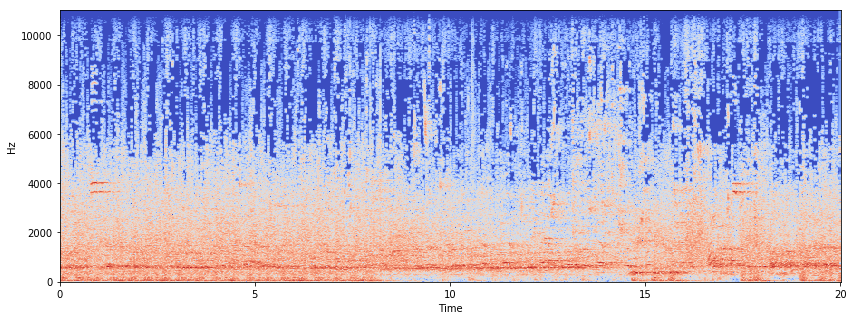

In [16]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [18]:
# apply fft 
import scipy as sp

ft = sp.fft(data)


In [19]:
ft

array([[ -477.+0.j,   411.+0.j],
       [ -820.+0.j,   488.+0.j],
       [ -955.+0.j,   555.+0.j],
       ...,
       [ -613.+0.j, -2321.+0.j],
       [ -135.+0.j, -2159.+0.j],
       [  483.+0.j, -2079.+0.j]])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

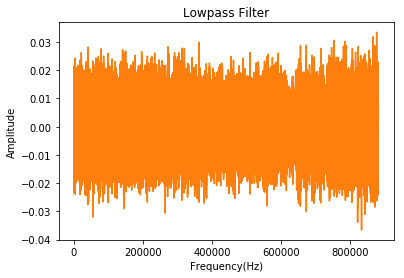

In [22]:
from scipy import signal

c,d = signal.butter(5, 380/(sr/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,ft) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')